In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import inspect

In [4]:
print(inspect.getsource(plt.streamplot))

@docstring.copy(Axes.streamplot)
def streamplot(
        x, y, u, v, density=1, linewidth=None, color=None, cmap=None,
        norm=None, arrowsize=1, arrowstyle='-|>', minlength=0.1,
        transform=None, zorder=None, start_points=None, maxlength=4.0,
        integration_direction='both', *, data=None):
    __ret = gca().streamplot(
        x, y, u, v, density=density, linewidth=linewidth, color=color,
        cmap=cmap, norm=norm, arrowsize=arrowsize,
        arrowstyle=arrowstyle, minlength=minlength,
        transform=transform, zorder=zorder, start_points=start_points,
        maxlength=maxlength,
        integration_direction=integration_direction, **({"data": data}
        if data is not None else {}))
    sci(__ret.lines)
    return __ret



***Installing the AdaptiveGridDiscretizations (AGD) library.*** This notebook requires that the AGD library is available on your computer. You may install it using *Anaconda*, using *Pip*, or rely on a *local copy on your computer*. For that purpose, you may uncomment one of the lines in the following cell.

In [12]:
#!conda install agd -c agd-lbr      # Install the AGD library via Anaconda
#!pip install agd                   # Install the AGD library via pip (required on Google Colab)
import sys; sys.path.insert(0,"..") # Use a copy of the AGD library stored in the parent directory

***Installing the HamiltonFastMarching (HFM) library.*** In order to use the CPU eikonal solver, `eikonal_mode="cpu"`, the HFM library needs to be available on your computer. For that purpose, you may uncomment one of the lines in the following cell. Nothing needs to be done for the gpu eikonal solver, `eikonal_mode="gpu"`, which is included in the AGD library, or to use a local copy.

In [14]:
## DO NOTHING if eikonal_mode="gpu"
## DO NOTHING if the HFM library is compiled from source on your computer
#!conda install hfm -c agd-lbr # Install the HFM library via Anaconda

def streamplot(axes, x, y, u, v, density=1, linewidth=None, color=None,
               cmap=None, norm=None, arrowsize=1, arrowstyle='-|>',
               minlength=0.1, transform=None, zorder=None, start_points=None,
               maxlength=4.0, integration_direction='both'):
    """
    Draw streamlines of a vector flow.

    Parameters
    ----------
    x, y : 1D arrays
        An evenly spaced grid.
    u, v : 2D arrays
        *x* and *y*-velocities. The number of rows and columns must match
        the length of *y* and *x*, respectively.
    density : float or (float, float)
        Controls the closeness of streamlines. When ``density = 1``, the domain
        is divided into a 30x30 grid. *density* linearly scales this grid.
        Each cell in the grid can have, at most, one traversing streamline.
        For different densities in each direction, use a tuple
        (density_x, density_y).
    linewidth : float or 2D array
        The width of the stream lines. With a 2D 

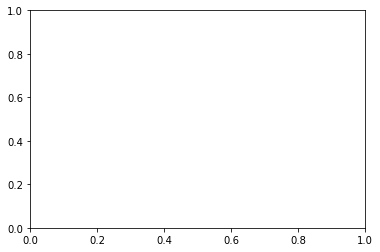

In [8]:
print(inspect.getsource(plt.gca().streamplot))

In [2]:
import sys; sys.path.insert(0,"../..")
from agd import AutomaticDifferentiation as ad

In [3]:
x=ad.Dense.identity((2,))
x_dis = ad.disassociate(x,shape_free=(2,))

In [6]:
if ad.Optimization.norm_infinity(x_dis)<0.1: print('hi')

hi


In [4]:
np.max(np.vectorize(np.abs)(x_dis))

denseAD(array([0.]),array([[0., 0.]]))

In [5]:
np.abs(x_dis)

TypeError: bad operand type for abs(): 'denseAD'

In [5]:
ad.Optimization.norm_infinity(x)

denseAD(array(0.),array([0., 0.]))

In [5]:
ad.Optimization.norm_infinity(ad.disassociate(x,shape_free=(2,)))

TypeError: bad operand type for abs(): 'denseAD'

In [4]:
np.max(np.abs(ad.disassociate(x.value,shape_free=(2,))))

array([0.])

In [23]:
ad.disassociate(x.value,shape_free=(2,)).dtype == np.object

True

In [9]:
np.abs(x)

denseAD(array([[0., 0.],
       [0., 0.]]),
array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.]],

       [[0., 0., 0., 0.],
        [0., 0., 0., 0.]]]))

In [4]:
x.argmin()

0

In [4]:
x.new((1,2))

denseAD(array([1, 2]),array([], shape=(2, 0), dtype=int64))

In [5]:
(x+1).sqrt()

denseAD(array([[1., 1.],
       [1., 1.]]),
array([[[0.5, 0. , 0. , 0. ],
        [0. , 0.5, 0. , 0. ]],

       [[0. , 0. , 0.5, 0. ],
        [0. , 0. , 0. , 0.5]]]))

In [10]:
np.reshape(x,(4,))

denseAD(array([0., 0., 0., 0.]),
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]]))

In [12]:
a = np.array((4,1,2,3))
a.sort()
a

array([1, 2, 3, 4])

In [10]:
a

array([1, 2, 3, 4])

In [5]:
np.floor(x).astype(int)

array([[0, 0],
       [0, 0]])

In [6]:
np.expand_dims(x,axis=0)

denseAD(array([[[0., 0.],
        [0., 0.]]]),
array([[[[1., 0., 0., 0.],
         [0., 1., 0., 0.]],

        [[0., 0., 1., 0.],
         [0., 0., 0., 1.]]]]))

In [5]:
import inspect
print(inspect.getsource(np.take_along_axis))

@array_function_dispatch(_take_along_axis_dispatcher)
def take_along_axis(arr, indices, axis):
    """
    Take values from the input array by matching 1d index and data slices.

    This iterates over matching 1d slices oriented along the specified axis in
    the index and data arrays, and uses the former to look up values in the
    latter. These slices can be different lengths.

    Functions returning an index along an axis, like `argsort` and
    `argpartition`, produce suitable indices for this function.

    .. versionadded:: 1.15.0

    Parameters
    ----------
    arr: ndarray (Ni..., M, Nk...)
        Source array
    indices: ndarray (Ni..., J, Nk...)
        Indices to take along each 1d slice of `arr`. This must match the
        dimension of arr, but dimensions Ni and Nj only need to broadcast
        against `arr`.
    axis: int
        The axis to take 1d slices along. If axis is None, the input array is
        treated as if it had first been flattened to 1d, for con

In [14]:
np.normalize_axis_index(1,2)

AttributeError: module 'numpy' has no attribute 'normalize_axis_index'

In [18]:
'abl'.replace('b','B')

'aBl'

In [5]:
'0.1.21'.split('.')

['0', '1', '21']

In [6]:
l=[1,2,3]; l[-1]+=1; l

[1, 2, 4]

In [9]:
bool('False')

True

In [12]:
from distutils.util import strtobool
strtobool('True')

1

In [14]:
[1,2,3]==[1,2,3]

True

In [1]:
# Python code to generate the contents of this file.
import numpy as np
def wasserstein(a,b):
    """Return the L2 wasserstein distance between 1D measures equidistributed at the given points"""
    a,b = np.sort(np.repeat(a,len(b))), np.sort(np.repeat(b,len(a)))
    return ((a-b)**2).sum()/len(a)

def nextpoint(a,n):
    """Choose the next point to insert in a which makes it closest to range(n) in wasserstein distance"""
    return np.argmin(list(wasserstein(a+[i],range(n)) if i not in a else np.inf for i in range(n)))

def eqseq(n):
    """Greedy ordering to approximate range(n) as well as possible as quickly as possible"""
    a=[]
    for i in range(n): 
        a = a+[nextpoint(a,n)]
    return a

def display(l):
    n=len(l)
    print(f"const int eqseq{n}[{n}] = {{{','.join(map(str,l))}}};")

In [47]:
def wasserstein(a,b):
    """Return the L2 wasserstein distance between 1D measures equidistributed at the given points"""
    a,b = np.sort(np.repeat(a,len(b))), np.sort(np.repeat(b,len(a)))
    return ((a-b)**2).sum()/len(a)

def nextpoint(a,n):
    """Choose the next point to insert in a which makes it closest to range(n) in wasserstein distance"""
    return np.argmin(list(wasserstein(a+[i],range(n)) if i not in a else np.inf for i in range(n)))

def eqseq(n):
    """Greedy ordering to approximate range(n) as well as possible as quickly as possible"""
    a=[]
    for i in range(n): 
        a = a+[nextpoint(a,n)]
    return a

def display(l):
    n=len(l)
    print(f"template<> int eqseq<{n}>[{n}] = {{{','.join(map(str,l))}}};")

In [3]:
for i in range(1,21):
    display(eqseq(i))

const int eqseq1[1] = {0};
const int eqseq2[2] = {0,1};
const int eqseq3[3] = {1,0,2};
const int eqseq4[4] = {1,2,0,3};
const int eqseq5[5] = {2,1,4,0,3};
const int eqseq6[6] = {2,4,0,3,5,1};
const int eqseq7[7] = {3,1,5,2,6,0,4};
const int eqseq8[8] = {3,5,1,6,2,4,0,7};
const int eqseq9[9] = {4,2,7,1,6,3,8,0,5};
const int eqseq10[10] = {4,7,1,6,2,9,3,5,0,8};
const int eqseq11[11] = {5,2,9,4,7,0,8,3,10,1,6};
const int eqseq12[12] = {5,8,1,10,3,6,2,9,4,11,0,7};
const int eqseq13[13] = {6,3,10,1,9,5,12,2,7,4,11,0,8};
const int eqseq14[14] = {6,10,2,8,4,12,0,9,5,13,3,7,1,11};
const int eqseq15[15] = {7,3,12,5,10,1,13,6,9,0,11,4,14,2,8};
const int eqseq16[16] = {7,11,2,13,4,9,1,14,6,10,3,12,5,8,0,15};
const int eqseq17[17] = {8,4,14,2,11,7,15,1,10,5,13,3,12,6,16,0,9};
const int eqseq18[18] = {8,13,2,11,5,16,3,10,6,15,0,12,7,17,1,9,14,4};
const int eqseq19[19] = {9,4,15,7,13,1,17,5,11,2,16,8,12,3,14,6,18,0,10};
const int eqseq20[20] = {9,14,3,17,5,11,1,16,7,12,4,19,8,0,15,10,6,18,2,13};


In [31]:
','.join(map(str,[1,2,3]))

'1,2,3'

In [29]:
[order(i) for i in range(2,20)]

[[0, 1],
 [1, 0, 2],
 [1, 2, 0, 3],
 [2, 1, 4, 0, 3],
 [2, 4, 0, 3, 5, 1],
 [3, 1, 5, 2, 6, 0, 4],
 [3, 5, 1, 6, 2, 4, 0, 7],
 [4, 2, 7, 1, 6, 3, 8, 0, 5],
 [4, 7, 1, 6, 2, 9, 3, 5, 0, 8],
 [5, 2, 9, 4, 7, 0, 8, 3, 10, 1, 6],
 [5, 8, 1, 10, 3, 6, 2, 9, 4, 11, 0, 7],
 [6, 3, 10, 1, 9, 5, 12, 2, 7, 4, 11, 0, 8],
 [6, 10, 2, 8, 4, 12, 0, 9, 5, 13, 3, 7, 1, 11],
 [7, 3, 12, 5, 10, 1, 13, 6, 9, 0, 11, 4, 14, 2, 8],
 [7, 11, 2, 13, 4, 9, 1, 14, 6, 10, 3, 12, 5, 8, 0, 15],
 [8, 4, 14, 2, 11, 7, 15, 1, 10, 5, 13, 3, 12, 6, 16, 0, 9],
 [8, 13, 2, 11, 5, 16, 3, 10, 6, 15, 0, 12, 7, 17, 1, 9, 14, 4],
 [9, 4, 15, 7, 13, 1, 17, 5, 11, 2, 16, 8, 12, 3, 14, 6, 18, 0, 10]]

In [28]:
order(10)

[4, 7, 1, 6, 2, 9, 3, 5, 0, 8]

In [13]:
np.inf

inf